
<hr style="margin-bottom: 40px;">

<right><img width="370" src='https://cloudfront-us-east-1.images.arcpublishing.com/coindesk/LPHITODUJRBNJJBJLFGNHBIBR4.png'></right>

<h2 align="center">Analysis of Top 3 Cryptocurrencies of 2021</h2>

<h2 align="center">This analysis includes 24h %Change in Price, Historical Prices, Market Caps and Total Volumes of Cryptocurrencies</h2>

<br>

>Source: [Yahoo Finance](https://finance.yahoo.com/news/top-10-cryptocurrencies-2021-155550018.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAABQtvooNuZV-X8Hw5Vx4z_BhqGOzXC_26Km7UXfI2CbizOOx9TAlRlc123GBIhxgTtBSlLUDy9GtZPV2GObww9toZ6mxNs-gTrd2hg_CRL8kgFPvSfAWVj-paOuQv8F0xzkVCaMNB0YRXgupp_SXDLpBPnAo8V8E5k0LCt598HNR)

#### Links to the parts of Notebook:
1. <a href = "#1.-Compare-24h-%Change-in-Prices-of-3-Cryptocurrencies">Compare 24h %Change in Prices of 3 Cryptocurrencies</a>
2. <a href = "#2.-Extract-and-Analyze-Historical-Date-of-3-Cryptocurrencies">Extract and Analyze Historical Date of 3 Cryptocurrencies</a>
3. <a href = "#3.-Compare-Historical-Prices-of-3-Cryptocurrencies">Compare Historical Prices of 3 Cryptocurrencies</a>
4. <a href = "#4.-Extract-Market-Caps-of-Cryptocurrencies">Compare Historical Prices of 3 Cryptocurrencies</a>
5. <a href = "#5.-Compare-Market-Caps-of-3-Cryptocurrencies">Compare Market Caps of 3 Cryptocurrencies</a>
6. <a href = "#6.-Extract-Total-Volumes-of-Cryptocurrencies">Extract Total Volumes of Cryptocurrencies</a>
7. <a href = "#7.-Compare-Volumes-of-3-Cryptocurrencies">Compare Volumes of 3 Cryptocurrencies</a>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 1. Compare 24h %Change in Prices of 3 Cryptocurrencies

### Import Libraries

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

>We will import data from [Cryptowatch](https://cryptowat.ch/). For reference, check [their docs](https://cryptowat.ch/docs/api#ohlc)
<br>Firstly, let's define a function to simplyfy extracting data

In [2]:
def get_pct_change(symbol):
    url = 'https://api.cryptowat.ch/markets/bitstamp/{symbol}/summary'.format(symbol=symbol)
    r = requests.get(url)
    if r.ok == True:
        info = r.json()
        current_price = info['result']['price']['change']['percentage']
        return current_price
    else:
        print('Unfortunately there is such an error:', r.status_code)

### %Change in Price of `The Sandbox (SAND)`

In [3]:
sand_change = get_pct_change('sandusd')
sand_change 

0.026846001191907134

### %Change in Price of `Axie Infinity (AXS)`

In [4]:
axs_change = get_pct_change('axsusd')
axs_change

-0.023170731707317142

### %Change in Price of `Polygon (MATIC)`

In [5]:
matic_change = get_pct_change('maticusd')
round(matic_change,3)

0.008

### Comparison

In [6]:
print('24h %Change in the price of SAND:',sand_change,'\n24h %Change in the price of AXS:',axs_change,'\n24h %Change in the price of MATIC:',matic_change)

24h %Change in the price of SAND: 0.026846001191907134 
24h %Change in the price of AXS: -0.023170731707317142 
24h %Change in the price of MATIC: 0.0075963810499268675


>As we see AXS has highest price change while SAND has lowest one

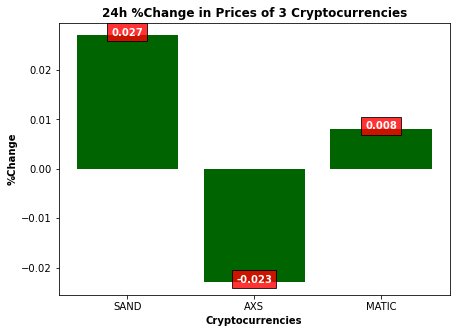

In [7]:
#Let's visualize
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',fontweight='bold',color='white',
                 bbox = dict(facecolor = 'red', alpha =.8))

x = ['SAND', 'AXS','MATIC']
y = [round(sand_change,3),round(axs_change,3),round(matic_change,3)]

plt.figure(figsize=(7,5))
plt.bar(x,y,color = '#006400')
addlabels(x, y)
plt.title('24h %Change in Prices of 3 Cryptocurrencies',fontweight='bold')
plt.xlabel('Cryptocurrencies',fontweight='bold')
plt.ylabel('%Change',fontweight='bold')
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 2. Extract and Analyze Historical Date of 3 Cryptocurrencies

### Extract Historical Data of _`SAND`_

>Firstly, let's define a function to simplify extracting historic prices of 3 cryptocurrencies 

In [8]:
def get_historic_price(symbol,after):
    url = 'https://api.cryptowat.ch/markets/bitstamp/{symbol}usd/ohlc'.format(symbol=symbol)
    r = requests.get(url, params = {'periods': '3600','after': after})
    if r.ok == True:
        data = r.json()
        df = pd.DataFrame(data['result']['3600'],
                     columns = ['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])
        df['CloseTime'] = pd.to_datetime(df['CloseTime'],unit = 's')
        df.set_index('CloseTime',inplace = True)
        return df
    else:
        print('Unfortunately, there is such an error:', r.status_code)

In [9]:
last_year = (pd.Timestamp.now() - pd.offsets.Day(365))
last_year = str(int(pd.Timestamp(last_year).timestamp()))
last_year

'1609980324'

In [10]:
sand = get_historic_price('sand',last_year)

<AxesSubplot:title={'center':'Historical Price Change of The Sandbox (from 2021-01-06 to from 2022-01-06)'}, xlabel='CloseTime'>

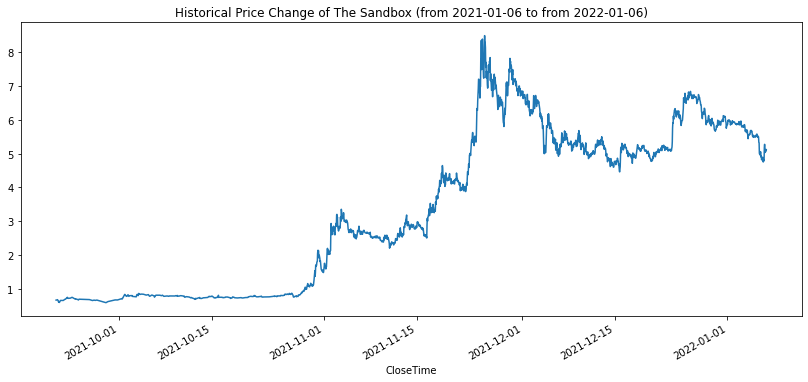

In [11]:
sand['ClosePrice'].plot(figsize=(14,6), 
                        title = 'Historical Price Change of The Sandbox (from 2021-01-06 to from 2022-01-06)')

### Extract Historical Data of _`AXS`_

In [12]:
axs = get_historic_price('axs',last_year)
axs.head(3)

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-09-21 12:00:00,55.55,55.55,55.550,55.550,0.100000,5.555000
2021-09-21 14:00:00,55.55,55.55,55.539,55.539,0.852107,47.330666
2021-09-22 02:00:00,56.20,56.20,56.200,56.200,0.400000,22.480000


<AxesSubplot:title={'center':'Historical Price Change of Axie Infinity (from 2021-01-06 to from 2022-01-06)'}, xlabel='CloseTime'>

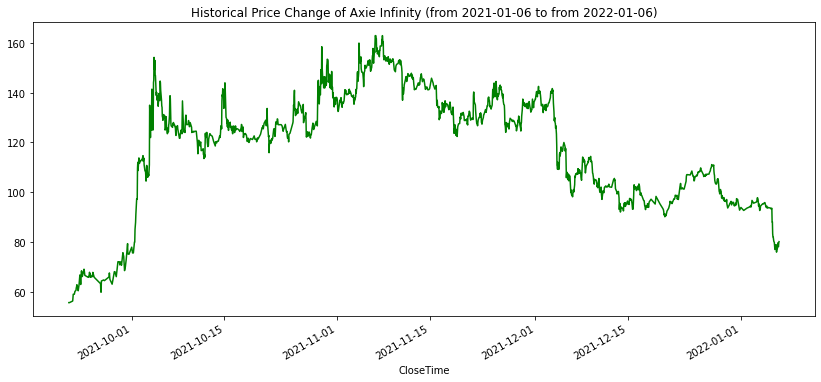

In [13]:
axs['ClosePrice'].plot(figsize=(14,6),color = 'green',
                       title = 'Historical Price Change of Axie Infinity (from 2021-01-06 to from 2022-01-06)')

### Extract Historical Data of _`MATIC`_

In [14]:
matic = get_historic_price('matic',last_year)
matic.head(3)

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-08-10 12:00:00,1.14400,1.14400,1.14400,1.14400,6.060254,6.932931
2021-08-10 13:00:00,1.15237,1.18012,1.14340,1.18012,2162.497881,2497.844244
2021-08-10 14:00:00,1.16800,1.17000,1.15003,1.16068,20275.539096,23485.570879


<AxesSubplot:title={'center':'Historical Price Change of Polygon (from 2021-01-06 to from 2022-01-06)'}, xlabel='CloseTime'>

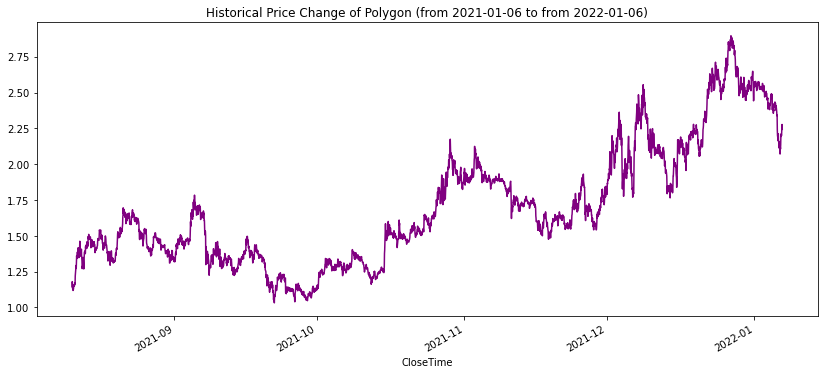

In [15]:
matic['ClosePrice'].plot(figsize=(14,6),color = 'purple',
                        title = 'Historical Price Change of Polygon (from 2021-01-06 to from 2022-01-06)')

## 3. Compare Historical Prices of 3 Cryptocurrencies

>We will use `log transformation` in order to make it as “normal” as possible for comparison

In [16]:
axs['LogClosePrice'] = np.log(axs['ClosePrice'])
sand['LogClosePrice'] = np.log(sand['ClosePrice'])
matic['LogClosePrice'] = np.log(matic['ClosePrice'])

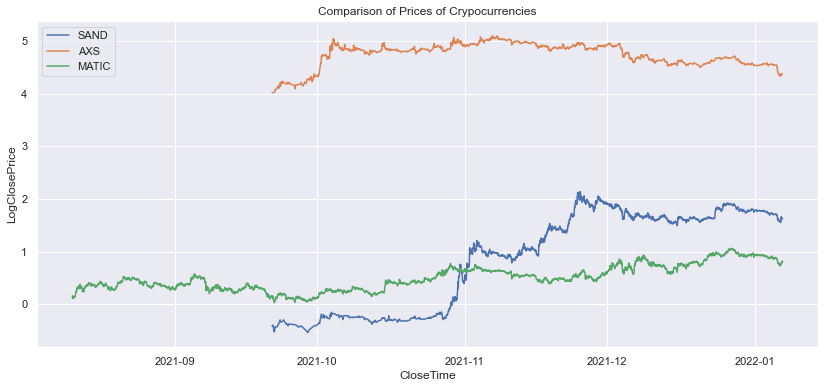

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,6)})
sns.set_style("darkgrid")
sns.lineplot(data = sand['LogClosePrice'],label='SAND').set_title("Comparison of Prices of Crypocurrencies")
sns.lineplot(data = axs['LogClosePrice'],label='AXS')
sns.lineplot(data = matic['LogClosePrice'],label='MATIC')
plt.show()

## 4. Extract Market Caps of Cryptocurrencies

>This time we will use api from [CoinGecko](https://www.coingecko.com/en). For reference, check [their docs](https://www.coingecko.com/en/api/documentation)
<br>As always, firstly, let's define a function that simplifies the process of importing data

In [18]:
def get_market_cap(coin_id):
    url = 'https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range?vs_currency=usd&from=1609891200&to=1641427200'.format(coin_id=coin_id)
    r = requests.get(url)
    if r.ok == True:
        data = r.json()
        df = pd.DataFrame(data['market_caps'],
                         columns = ['Date','Market_Cap'])
        df['Date'] = pd.to_datetime(df['Date'],unit = 'ms')
        df.set_index('Date', inplace = True)
        return df
    else:
        print('Unfortunately, there is such an error:', r.status_code)

In [19]:
sand = get_market_cap('the-sandbox')
axs = get_market_cap('axie-infinity')
matic = get_market_cap('matic-network')

## 5. Compare Market Caps of 3 Cryptocurrencies

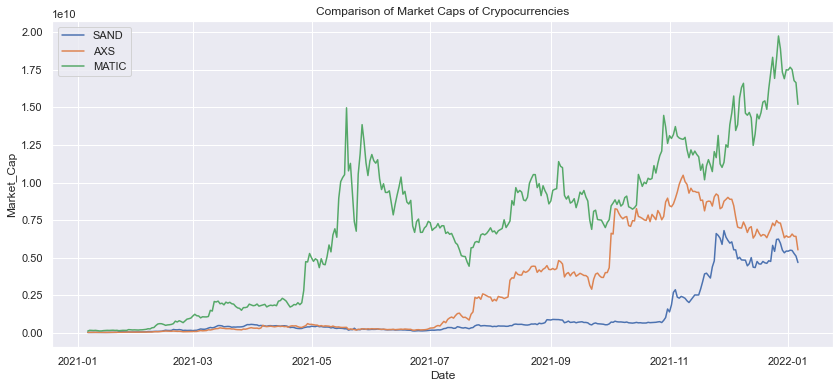

In [20]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,6)})
sns.set_style("darkgrid")
sns.lineplot(data = sand['Market_Cap'],label='SAND').set_title("Comparison of Market Caps of Crypocurrencies")
sns.lineplot(data = axs['Market_Cap'],label='AXS')
sns.lineplot(data = matic['Market_Cap'],label='MATIC')
plt.show()

## 6. Extract Total Volumes of Cryptocurrencies

In [21]:
def get_total_volume(coin_id):
    url = 'https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range?vs_currency=usd&from=1609891200&to=1641427200'.format(coin_id=coin_id)
    r = requests.get(url)
    if r.ok == True:
        data = r.json()
        df = pd.DataFrame(data['total_volumes'],
                         columns = ['Date','Volume'])
        df['Date'] = pd.to_datetime(df['Date'],unit = 'ms')
        df.set_index('Date', inplace = True)
        return df
    else:
        print('Unfortunately, there is such an error:', r.status_code)

In [22]:
sand = get_total_volume('the-sandbox')
axs = get_total_volume('axie-infinity')
matic = get_total_volume('matic-network')

## 7. Compare Volumes of 3 Cryptocurrencies

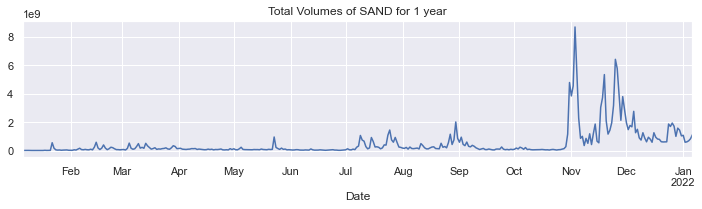

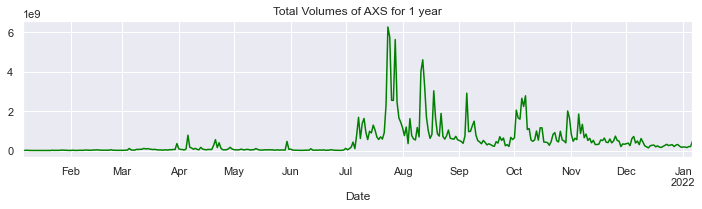

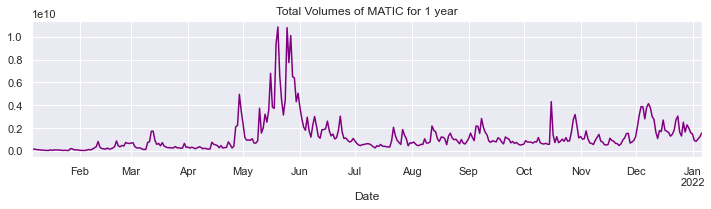

In [23]:
sand['Volume'].plot(figsize = (12,2.5),title = 'Total Volumes of SAND for 1 year')
plt.show()
axs['Volume'].plot(figsize = (12,2.5),color = 'green',title = 'Total Volumes of AXS for 1 year')
plt.show()
matic['Volume'].plot(figsize = (12,2.5),color = 'purple',title = 'Total Volumes of MATIC for 1 year')
plt.show()